Text Preprocessing

*   Lowercasing
*   Tokenization
*   Removing stopwords
*   Lemmatization

In [66]:
# !python3 -m pip install nltk
# !python3 -m nltk.downloader punkt
# !python3 -m nltk.downloader stopwords
# !python3 -m nltk.downloader wordnet

In [73]:
import pandas as pd

tripadvisor_review_data = 'https://raw.githubusercontent.com/krishanuc/CapstoneProjectData/refs/heads/tripadvisor-dataset/tripadvisor/tripadvisor_hotel_reviews.csv'

# Load thre review data from csv file into Pandas data frame
ta_reviews_df = pd.read_csv(tripadvisor_review_data)

# Print info to check columns types, rows count, and if there are null values in the columns
# print(ta_reviews_df.info())
print(ta_reviews_df['Review'].dtypes)
print(list(ta_reviews_df.columns))
# print(ta_reviews_df['Review'])
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')
print(ta_reviews_df['Review'].dtypes)

ta_reviews_df.head()

object
['Review', 'Rating']
string


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


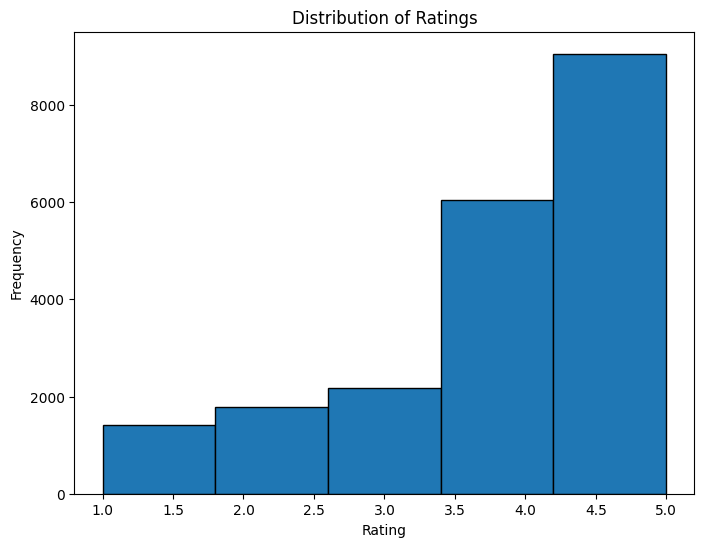

In [68]:
# @title Distribution of Ratings

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(ta_reviews_df['Rating'], bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
_ = plt.ylabel('Frequency')

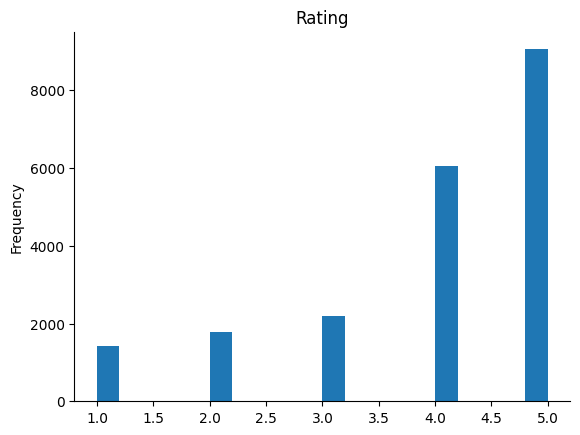

In [69]:
# @title Rating

from matplotlib import pyplot as plt
ta_reviews_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

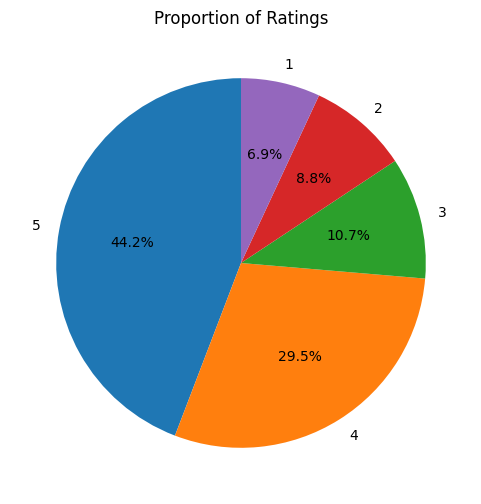

In [70]:
# @title Proportion of Ratings

import matplotlib.pyplot as plt

rating_counts = ta_reviews_df['Rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Proportion of Ratings')

In [71]:
import re

# Some basic pre-processing
# Remove links
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: re.sub(r"(www|http|https|pic)([a-zA-Z\.0-9:=\\~#/_\&%\?\-])*", ' ', x))

# Remove mention symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('@', ''))

# Remove hashtag symbol
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.replace('#', ''))

# Convert all text to lower case (this helps in vectorization and training)
ta_reviews_df['Review'] = ta_reviews_df['Review'].apply(lambda x: x.lower())

print(ta_reviews_df.dtypes)

# Convert Review column as string
ta_reviews_df['Review'] = ta_reviews_df['Review'].astype('string')

#print(ta_reviews_df.dtypes)

# Print info after pre-processing
#print(ta_reviews_df.info())

ta_reviews_df.head()

Review    object
Rating     int64
dtype: object


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


Topic extraction using Latent Dirichlet Allocation (LDA).

Topics were extracted from a set of documents.
* Note : The document creation has some bugs.

In [72]:
import gensim
from gensim import corpora
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

merged_ta_reviews = ta_reviews_df['Review'].tolist()
print(merged_ta_reviews)

documents = merged_ta_reviews
# documents = [
#     "I love the battery life of this phone, it's amazing!",
#     "The camera quality of the phone is great but the price is high.",
#     "I am very disappointed with the customer service, they were not helpful.",
#     "The screen resolution is good, but the design is not great."
# ]

# Preprocess the text (tokenization, stopwords removal)
stop_words = set(stopwords.words("english"))

def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    return [token for token in tokens if token.isalnum() and token not in stop_words]

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Apply LDA
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=3, id2word=dictionary)

# Print topics
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)


Output hidden; open in https://colab.research.google.com to view.